# Arnoldi iteration: Eigenvalues

Study performance of Arnoldi approximation of eigenvalues on matrices from the [Harwell-Boeing collection](https://math.nist.gov/MatrixMarket/data/Harwell-Boeing/). Demonstrate use of mixed Fortran-Python coding.


## Problem setup

Define Python environment

In [1]:
import numpy as np
import pylab as plt
import scipy as sci
import scipy.io as sio
import scipy.sparse as sp
import os

In [2]:
os.getcwd()

'/home/mitran/web/courses/MATH662'

Load a matrix

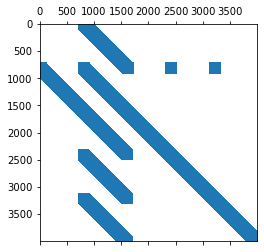

In [4]:
Asp=sio.mmread("./examples/Arnoldi/tols4000.mtx");
plt.spy(Asp)

In [5]:
sp.issparse(Asp)

True

In [6]:
A = np.array(Asp.todense('F'))
A.dtype

dtype('float64')

In [7]:
[m,mcol]=np.shape(A)
[m,mcol]

[4000, 4000]

Find eigenvalues through np.eigvals for comparison with Arnoldi-Ritz estimates

In [8]:
Lambda=np.linalg.eigvals(A)

In [10]:
Lambda[0:10]

array([-12.098+0.j, -12.098+0.j, -12.098+0.j, -12.098+0.j, -12.098+0.j,
       -12.098+0.j, -12.098+0.j, -12.098+0.j, -12.098+0.j, -12.098+0.j])

In [11]:
Lambda[3990:4000]

array([-502.8141 +2835.76761757j, -502.8141 -2835.76761757j,
       -526.72745+2898.52966061j, -526.72745-2898.52966061j,
       -466.94912+2738.47448762j, -466.94912-2738.47448762j,
       -490.00447+2801.4695464j , -490.00447-2801.4695464j ,
       -511.44565+2858.60793868j, -511.44565-2858.60793868j])

## Define Fortran computational routine

If the instruction below leads to errors, the fortran_magic module is probably not yet install. Do so in a terminal by:

sudo pip install -U fortran-magic

In [12]:
%load_ext fortranmagic

In the background, FortranMagic invokes the f2py utility to compile Fortran code and transparently provide an interface for calls from Python

In [13]:
%%fortran -v
subroutine arnoldi(A,b,H,Q,v,nK,m,n)
  integer, intent(in) :: m,n
  integer, intent(out) :: nK
  real*8, intent(in) :: A(m,m), b(m)
  real*8, intent(out) :: H(n+1,n), Q(m,n+1), v(m)
  H = 0.d0
  Q(:,1) = b/NORM2(b)
  do k=1,n
    v = MATMUL(A,Q(:,k)); nK=k
    do j=1,k
      H(j,k) = DOT_PRODUCT(Q(:,j),v)      
      v = v - H(j,k)*Q(:,j)
    end do
    H(k+1,k) = NORM2(v)
    if (H(k+1,k)<1.0d-14) exit      
    Q(:,k+1) = v/H(k+1,k)
  end do
end subroutine arnoldi


Ok. The following fortran objects are ready to use: arnoldi


## Invoke Fortran `arnoldi` routine

### Krylov space of dimension $n=10$

Invoke the Arnoldi algorithm to return 

In [23]:
n=5
b=np.array(np.ones(m)       , dtype='float64', order='F')
H=np.array(np.zeros([n+1,n]), dtype='float64', order='F')
Q=np.array(np.zeros([m,n+1]), dtype='float64', order='F')
v=np.array(np.zeros([m,1])  , dtype='float64', order='F')
[H,Q,v,nK]=arnoldi(A,b,n)
nK

5

In [24]:
Ritz = np.linalg.eigvals(H[0:nK,0:nK])

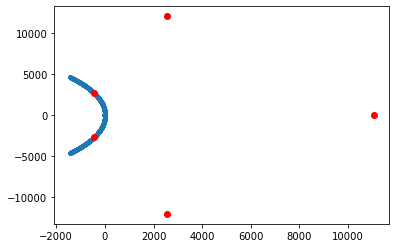

In [25]:
plt.plot(Lambda.real,Lambda.imag,'.',Ritz.real,Ritz.imag,'or')

### Krylov space of dimension $n=20$

Invoke the Arnoldi algorithm to return 

In [23]:
n=20
b=np.array(np.random.randn(m)       , dtype='float64', order='F')
H=np.array(np.zeros([n+1,n]), dtype='float64', order='F')
Q=np.array(np.zeros([m,n+1]), dtype='float64', order='F')
v=np.array(np.zeros([m,1])  , dtype='float64', order='F')
[H,Q,v,nK]=arnoldi(A,b,n)
nK

20

In [24]:
Ritz = np.linalg.eigvals(H[0:nK,0:nK])

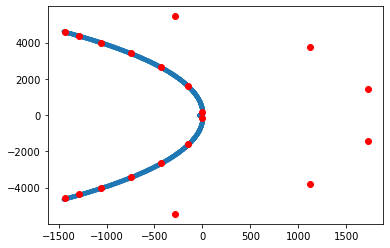

In [25]:
plt.plot(Lambda.real,Lambda.imag,'.',Ritz.real,Ritz.imag,'or')

### Krylov space of dimension $n=200$

Invoke the Arnoldi algorithm to return 

In [29]:
n=2000
b=np.array(np.ones(m)       , dtype='float64', order='F')
H=np.array(np.zeros([n+1,n]), dtype='float64', order='F')
Q=np.array(np.zeros([m,n+1]), dtype='float64', order='F')
v=np.array(np.zeros([m,1])  , dtype='float64', order='F')
[H,Q,v,nK]=arnoldi(A,b,n)
nK

2000

In [30]:
Ritz = np.linalg.eigvals(H[0:nK,0:nK])

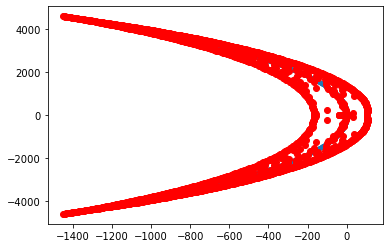

In [31]:
plt.plot(Lambda.real,Lambda.imag,'.',Ritz.real,Ritz.imag,'or')

### Krylov space of dimension $n=400$

Invoke the Arnoldi algorithm to return 

In [18]:
n=400
b=np.array(np.ones(m)       , dtype='float64', order='F')
H=np.array(np.zeros([n+1,n]), dtype='float64', order='F')
Q=np.array(np.zeros([m,n+1]), dtype='float64', order='F')
v=np.array(np.zeros([m,1])  , dtype='float64', order='F')
[H,Q,v,nK]=arnoldi(A,b,n)
nK

400

In [19]:
Ritz = np.linalg.eigvals(H[0:nK,0:nK])

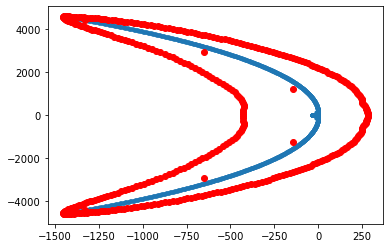

In [20]:
plt.plot(Lambda.real,Lambda.imag,'.',Ritz.real,Ritz.imag,'or')